In [2]:
from data import parse_reuters_articles
import pandas as pd
# python3 -m pip install pandas pyarrow

In [3]:
articles = parse_reuters_articles("../REUTERS_CORPUS_2")

In [5]:
articles[0]

{'id': '632411',
 'date': '1997-06-02',
 'codes': ['C12', 'CCAT', 'GCAT', 'GCRIM'],
 'headline': 'Seoul court jails 10 in Hanbo corruption scandal.',
 'text': 'A South Korean court on Monday handed lengthy jail sentences to the founder of the Hanbo Group and nine others, including lawmakers and former top bankers, in a corruption scandal that has rocked the nation. The founder of the country\'s 14th largest business conglomerate, Chung Tae-soo, was jailed for 15 years and his son Chung Bo-keun, three years for bribery and embezzlement. Chung junior is Hanbo\'s current chairman. The court heard evidence that Hanbo\'s 74-year-old patriach handed out huge sums of cash hidden in apple crates to politicians and bankers to keep loans rolling in to the group\'s steelmaking flagship, which collapsed in January under debts of five trillion won ($5.6 billion). A total of 11 people were standing trial in the Seoul District Criminal Court in a case that has deeply embarrassed President Kim Young-s

In [29]:
df = pd.DataFrame(articles)
df = df.convert_dtypes()
df["date"] = pd.to_datetime(df["date"])
dataset = df[["date", "headline", "text", "codes"]]
del df
dataset.to_feather("data.ft") # 1.4 GB > 275 MB
del dataset

## If you have "data.ft" already - start here

In [1]:
import pandas as pd
# reads in 1 sec
#dataset = pd.read_feather("data.ft")
dataset = pd.read_csv("../datafiles/data.csv")

In [2]:
dataset.head()

,date,headline,text,codes
0,1997-06-02,Seoul court jails 10 in Hanbo corruption scandal.,A South Korean court on Monday handed lengthy ...,C12 CCAT GCAT GCRIM
1,1997-06-02,"Rouble fixed at 3,370 per mark in Moscow.","The rouble was set at 3,370 to the German mark...",M13 M132 MCAT
2,1997-06-02,"SAKU FALLS ON SUSPENSION FEAR, OTHERS QUIET.",Saku Brewery fell 17 percent on the Tallinn bo...,M11 MCAT
3,1997-06-02,Coca-Cola's Powerade is NHL choice - WSJ.,Coca-Cola Co's Powerade may soon be the sport ...,GSPO
4,1997-06-02,"BUCHAREST BOURSE AVERAGE PRICES UP, VOLUME SLIPS.",The average prices of most Bucharest bourse li...,C15 C152 CCAT M11 MCAT


In [3]:
dataset.codes.str.split()

0                   [C12, CCAT, GCAT, GCRIM]
1                          [M13, M132, MCAT]
2                                [M11, MCAT]
3                                     [GSPO]
4               [C15, C152, CCAT, M11, MCAT]
                         ...                
299768    [C42, CCAT, E41, ECAT, GCAT, GJOB]
299769          [C33, CCAT, M14, M141, MCAT]
299770                     [C15, C151, CCAT]
299771                     [M14, M141, MCAT]
299772                           [M14, MCAT]
Name: codes, Length: 299773, dtype: object

### Plot label distribution

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def get_len(x):
    try:
        return len(x)
    except:
        return 0

a = dataset.codes.str.split().apply(get_len).value_counts().sort_index()

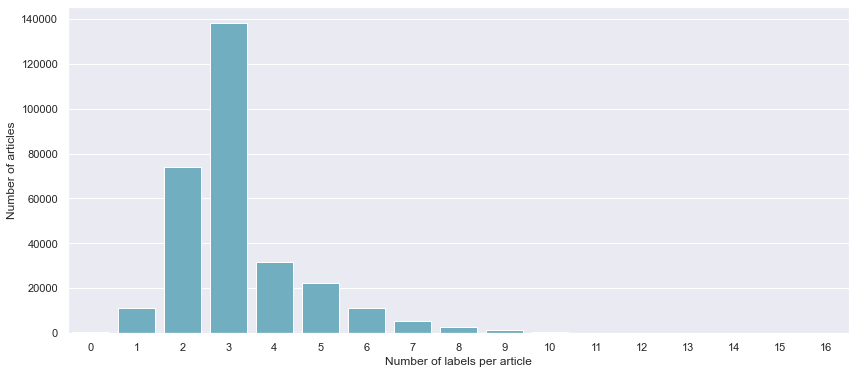

In [67]:
sns.set()
plt.figure(figsize=(14,6))
#plt.title("Distribution of label count assigned to a single article", fontsize=16)
plt.xlabel("Number of labels per article")
plt.ylabel("Number of articles")
_ = sns.barplot(x=a.index,y=a.to_numpy(), color="c")
plt.savefig("../IMG/nr_of_label_distribution.png")

### Plot categories

In [46]:
from collections import Counter

codes = []
def append_codes(row_list):
    try:
        [codes.append(x) for x in row_list]
    except TypeError: # for None
        pass
    return None

dataset.codes.str.split().apply(append_codes)
c = Counter(codes)
most_common_labels = [x[0] for x in c.most_common(10)]
most_common_values = [c[label] for label in most_common_labels]

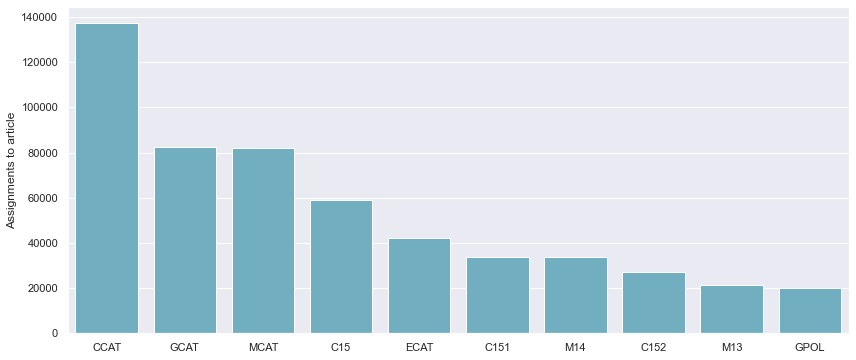

In [50]:
sns.set()
plt.figure(figsize=(14,6))
plt.ylabel("Assignments to article")
_ = sns.barplot(x=most_common_labels, y=most_common_values, color="c")
plt.savefig("../IMG/top10-labels.png")